In [142]:
import pandas as pd
import numpy as np
import struct
from scipy.sparse import coo_matrix, csc_matrix
import time
import networkx
import matplotlib.pyplot as plt

In [117]:
# Geen aoi
# WERKT

def read_trans_matrix(handle):
    '''read sparse matrix as saved by HDI saveSparseMatrix()
    data expected to be structured as:
    int number of rows 
        int number of fields in current row
            int column number of current field
            float value of current field
    in: filename of binary sparse matrix, mixed types
    out: 1d list of values'''
    matrix1d = []
    rows = struct.unpack('i', handle.read(4))[0]
    matrix1d.append(rows)
    for repeat in range(rows):
        rowlen = struct.unpack('i', handle.read(4))[0]
        matrix1d.append(rowlen)
        for fields in range(rowlen):
            matrix1d.append(struct.unpack('i', handle.read(4))[0])
            matrix1d.append(struct.unpack('f', handle.read(4))[0])
    return matrix1d

def read_uint_vector(handle):
    vectorlength = struct.unpack('i', handle.read(4))[0]
    print("Vector length: %i" % vectorlength)
    vector = []
    for i in range(vectorlength):
        vector.append(struct.unpack('i', handle.read(4))[0])
    return vector

def read_scalar_vector(handle):
    vectorlength = struct.unpack('i', handle.read(4))[0]
    print("Vector length: %i" % vectorlength)
    vector = []
    for i in range(vectorlength):
        vector.append(struct.unpack('f', handle.read(4))[0])
    return vector

def read_HSNE_binary(filename):
    with open(filename, 'rb') as handle:
        majorversion = struct.unpack('f', handle.read(4))[0]
        minorversion = struct.unpack('f', handle.read(4))[0]
        numscales = int(struct.unpack('f', handle.read(4))[0])
        scalesize = struct.unpack('f', handle.read(4))[0]
        print("Number of scales %i" % numscales )
        scales = []
        print("Start reading first scale")
        scale = read_trans_matrix(handle)
        print("Done reading first scale\n\n")
        scales.append(hdi_to_sparse(scale))
        for i in range(1, numscales):
            print("Next scale: %i" % i)
            print("Scale size: %i" % int(struct.unpack('f', handle.read(4))[0]))
            print("Transition matrix, ", scales)
            scale = read_trans_matrix(handle)
            scales.append(hdi_to_sparse(scale))
            print("Landmarks of scale to original data")
            landmarks_to_origin = read_uint_vector(handle)
            print("Landmarks to previous scale")
            landmarks_to_prev_scale = read_uint_vector(handle)
            print("Landmark weights")
            lm_weights = read_scalar_vector(handle)
            print("Previous scale to current scale")
            prev_to_current = read_uint_vector(handle)
            print()
            print()
        return scales, handle


def hdi_to_sparse(hdidata):
    '''convert 1d array to scipy coordinate format sparse matrix
    data expected to be structured as:
    int number of rows 
        int number of fields in current row
            int column number of current field
            float value of current field
    in: 1d array
    out: scipy sparse matrix'''
    hdidata = hdidata[::-1]
    tt = time.time()
    columns = []
    rows = []
    edgeweights = []
    shape = int(hdidata.pop())
    for rownum in range(shape):
        for field in range(int(hdidata.pop())):
            rows.append(rownum)
            columns.append(hdidata.pop())
            edgeweights.append(hdidata.pop())
    print(time.time() - tt)
    return coo_matrix((edgeweights, (rows, columns)), shape=(shape, shape))


In [123]:
tic = time.time()
scales, aoi = read_HSNE_binary('./HSNE_files/mnis_noaoi.bin')
print(time.time() - tic)

Number of scales 3
Start reading first scale
Done reading first scale


0.014319181442260742
Next scale: 1
Scale size: 236
Transition matrix,  [<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 30000 stored elements in COOrdinate format>]
0.0048406124114990234
Landmarks of scale to original data
Vector length: 236
Landmarks to previous scale
Vector length: 236
Landmark weights
Vector length: 236
Previous scale to current scale
Vector length: 1000


Next scale: 2
Scale size: 28
Transition matrix,  [<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 30000 stored elements in COOrdinate format>, <236x236 sparse matrix of type '<class 'numpy.float64'>'
	with 11242 stored elements in COOrdinate format>]
0.00032639503479003906
Landmarks of scale to original data
Vector length: 28
Landmarks to previous scale
Vector length: 28
Landmark weights
Vector length: 28
Previous scale to current scale
Vector length: 236


0.08700180053710938


# Parser for parsing HSNE binary file 

In [ ]:
tic = time.time()
scales, aoi = read_HSNE_binary('./HSNE_files/HSNE_full_AML.bin')
print(time.time() - tic)

In [5]:
def hdi_readfile(filename):
    '''read sparse matrix as saved by HDI saveSparseMatrix()
    data expected to be structured as:
    int number of rows 
        int number of fields in current row
            int column number of current field
            float value of current field
    in: filename of binary sparse matrix, mixed types
    out: 1d list of values'''
    matrix1d = []
    with open(filename, 'rb') as f:
        rows = struct.unpack('i', f.read(4))[0]
        matrix1d.append(rows)
        for repeat in range(rows):
            rowlen = struct.unpack('i', f.read(4))[0]
            matrix1d.append(rowlen)
            for fields in range(rowlen):
                matrix1d.append(struct.unpack('i', f.read(4))[0])
                matrix1d.append(struct.unpack('f', f.read(4))[0])
    return matrix1d



In [11]:
# a = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
# Extracting mappings [i for i, v in enumerate(a) if v > -1]

In [167]:
# AOI included
# Seems to work
def read_trans_matrix(handle):
    matrix1d = []
    rows = struct.unpack('i', handle.read(4))[0]
    matrix1d.append(rows)
    for repeat in range(rows):
        rowlen = struct.unpack('i', handle.read(4))[0]
        matrix1d.append(rowlen)
        for fields in range(rowlen):
            matrix1d.append(struct.unpack('i', handle.read(4))[0])
            matrix1d.append(struct.unpack('f', handle.read(4))[0])
    return matrix1d

def read_trans_matrix_aoi(handle):
    matrix1d = []
    rows = struct.unpack('i', handle.read(4))[0]
    print('rows: ', rows)
    matrix1d.append(rows)
    for repeat in range(rows):
        print('rownum: ', repeat)
        rowlen = struct.unpack('i', handle.read(4))[0]
        print('rowlen; ', rowlen)
        matrix1d.append(rowlen)
        for fields in range(rowlen):
            print('Iter in this row: ', fields)
            print("id: ", struct.unpack('i', handle.read(4))[0])
            print("value: ", struct.unpack('f', handle.read(4))[0])

    return matrix1d


def read_uint_vector(handle):
    vectorlength = struct.unpack('i', handle.read(4))[0]
    print("Vector length: %i" % vectorlength)
    vector = []
    for i in range(vectorlength):
        vector.append(struct.unpack('i', handle.read(4))[0])
    return vector

def read_scalar_vector(handle):
    vectorlength = struct.unpack('i', handle.read(4))[0]
    print("Vector length: %i" % vectorlength)
    vector = []
    for i in range(vectorlength):
        vector.append(struct.unpack('f', handle.read(4))[0])
    return vector

def read_HSNE_binary(filename):
    with open(filename, 'rb') as handle:
        majorversion = struct.unpack('f', handle.read(4))[0]
        minorversion = struct.unpack('f', handle.read(4))[0]
        numscales = int(struct.unpack('f', handle.read(4))[0])
        scalesize = struct.unpack('f', handle.read(4))[0]
        print("Number of scales %i" % numscales )
        scales = []
        aoi = []
        print("Start reading first scale")
        scale = read_trans_matrix(handle)
        print("Done reading first scale\n\n")
        scales.append(hdi_to_sparse(scale))
        print("Transition matrix, ", scales)
        for i in range(1, numscales):
            print("Next scale: %i" % i)
            print("Scale size: %i" % int(struct.unpack('f', handle.read(4))[0]))
            scale = read_trans_matrix(handle)
            scales.append(hdi_to_sparse(scale))
            print("Transition matrix, ", scales)

            print("Landmarks of scale to original data")
            landmarks_to_origin = read_uint_vector(handle)
            print("Landmarks to previous scale")
            landmarks_to_prev_scale = read_uint_vector(handle)
            print("Landmark weights")
            lm_weights = read_scalar_vector(handle)
            print("Previous scale to current scale")
            prev_to_current = read_uint_vector(handle)
            print("AOI")
            print(aoi)
            aoi_matrix = hdi_to_sparse(read_trans_matrix(handle))
            # AOI matrix has many trailing 0's due to being shape (current scale size, next scale size)
            # Where a coo matrix is always shape (current scale size, current scale size)
            # TO DO FIX AOI SHAPE
            
            aoi.append(aoi_matrix)
            
            print()
            print()
        return scales, aoi


def hdi_to_sparse(hdidata):
    '''convert 1d array to scipy coordinate format sparse matrix
    data expected to be structured as:
    int number of rows 
        int number of fields in current row
            int column number of current field
            float value of current field
    in: 1d array
    out: scipy sparse matrix'''
    hdidata = hdidata[::-1]
    tt = time.time()
    columns = []
    rows = []
    edgeweights = []
    shape = int(hdidata.pop())
    for rownum in range(shape):
        for field in range(int(hdidata.pop())):
            rows.append(rownum)
            columns.append(hdidata.pop())
            edgeweights.append(hdidata.pop())
    print(time.time() - tt)
    return coo_matrix((edgeweights, (rows, columns)), shape=(shape, shape))


In [168]:
tic = time.time()
scales, aoi = read_HSNE_binary('./HSNE_files/mnis_aoi.bin')
print(time.time() - tic)

Number of scales 3
Start reading first scale
696940
Done reading first scale


0.012598037719726562
Transition matrix,  [<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 30000 stored elements in COOrdinate format>]
Next scale: 1
Scale size: 236
452932
0.004658699035644531
Transition matrix,  [<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 30000 stored elements in COOrdinate format>, <236x236 sparse matrix of type '<class 'numpy.float64'>'
	with 11445 stored elements in COOrdinate format>]
Landmarks of scale to original data
Vector length: 236
Landmarks to previous scale
Vector length: 236
Landmark weights
Vector length: 236
Previous scale to current scale
Vector length: 1000
AOI
[]
353576
0.015930652618408203


Next scale: 2
Scale size: 29
51000
0.00037670135498046875
Transition matrix,  [<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 30000 stored elements in COOrdinate format>, <236x236 sparse matrix of type '<class 'numpy.float64'>'

In [136]:
np.savetxt("aoi_scale_2.csv", aoi[1].toarray(), delimiter=",")

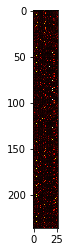

In [169]:
a = aoi[1].toarray()
plt.imshow(csc_matrix(aoi[1])[:, :27].toarray(), cmap='hot', interpolation='nearest')
plt.show()

In [157]:
len(csc_matrix(aoi[1])[:, :27].data)

4933

In [170]:
tic = time.time()
scales, aoi = read_HSNE_binary('./HSNE_files/AML_aoi.bin')
print(time.time() - tic)

Number of scales 5
Start reading first scale
201718604
Done reading first scale


3.570424795150757
Transition matrix,  [<265628x265628 sparse matrix of type '<class 'numpy.float64'>'
	with 7967164 stored elements in COOrdinate format>]
Next scale: 1
Scale size: 42500
136918772
1.3756613731384277
Transition matrix,  [<265628x265628 sparse matrix of type '<class 'numpy.float64'>'
	with 7967164 stored elements in COOrdinate format>, <42500x42500 sparse matrix of type '<class 'numpy.float64'>'
	with 3318099 stored elements in COOrdinate format>]
Landmarks of scale to original data
Vector length: 42500
Landmarks to previous scale
Vector length: 42500
Landmark weights
Vector length: 42500
Previous scale to current scale
Vector length: 265628
AOI
[]
108631448
4.119941711425781


Next scale: 2
Scale size: 5545
31101368
0.06816434860229492
Transition matrix,  [<265628x265628 sparse matrix of type '<class 'numpy.float64'>'
	with 7967164 stored elements in COOrdinate format>, <42500x42500 sparse

In [105]:
def LengthOfFile(f):
    """ Get the length of the file for a regular file (not a device file)"""
    currentPos=f.tell()
    f.seek(0, 2)          # move to end of file
    length = f.tell()     # get current position
    f.seek(currentPos, 0) # go back to where we started
    return length

def BytesRemaining(f,f_len):
    """ Get number of bytes left to read, where f_len is the length of the file (probably from f_len=LengthOfFile(f) )"""
    currentPos=f.tell()
    return f_len-currentPos

In [171]:
aoi

[<265628x265628 sparse matrix of type '<class 'numpy.float64'>'
 	with 9558445 stored elements in COOrdinate format>,
 <42500x42500 sparse matrix of type '<class 'numpy.float64'>'
 	with 3544731 stored elements in COOrdinate format>,
 <5545x5545 sparse matrix of type '<class 'numpy.float64'>'
 	with 110197 stored elements in COOrdinate format>,
 <190x190 sparse matrix of type '<class 'numpy.float64'>'
 	with 1424 stored elements in COOrdinate format>]